# Metodo basato sulla distanza: k-Nearest Neighbours

Uno dei metodi più semplici e intuitivi nel supervised learning, eppure un riferimento comune per metodi più specifici e potenti.  
L'idea è semplice:  
se due input $x$ e $x*$ sono **vicini** l'uno all'altro nello spazio di input, allora i loro corrispondenti output $y$ e $y*$ dovranno essere simili.  

Questa assunzione riflette una forma di levigatezza della relazione input-output sottostante.  
Piuttosto che imparare esplicitamente una funzione parametrica, k-NN basa le sue predizioni direttamente sui dati di addestramento osservati.
Dato un nuovo input $x^∗$, l'idea è:  
• cercare input di addestramento xi che siano vicini a $x^∗$;  
• combinare i loro output associati yi per produrre una predizione $\hat{y}^∗$.  

## Misura di distanza

k-NN ha bisogno di una nozione del concetto di **vicinanza**. Per semplicità possiamo usare la distanza *Euclidea* tra *due vettori di input $xi$ e $x*$*.  

$ ||x_{i} - x^*||_{2}   = \sqrt {\sum _{j=1}^{p}  \left( x_{ij}-x^*_{j}\right)^2 } $

## L'insieme dei k vicini più prossimi

Per calcolare la predizione $\hat{y}^*$, non valutiamo l'intero vettore di output $y$, ma solo una *parte* di esso. L'insieme di indici - l'insieme degli indici dei k vicini più prossimi - è definito come:  
$ N^* = \{ i: x_{i} \text{ is among the k closest points of } x^* \} $  
dove k è il numero di vicini.  
Quindi valutiamo solo gli output nell'insieme:
$ \{y_i : i ∈ N^* \} $

# Regole di Predizione

Una volta che abbiamo definito l'insieme di output da usare per calcolare la predizione, come la calcoliamo effettivamente?  

Per problemi di **regression**, dove l'output consiste di valori numerici, usiamo la media degli output appartenenti all'insieme di output:  
$ \hat{y}^* = \frac{1}{k}\sum_{i\in\mathcal{N}^*} y_i $  
  

Per problemi di **classification**, dove l'output consiste di valori categorici, usiamo la classe più frequente tra i vicini:  
$ \hat{y}^* = \arg\max_{c\in\mathcal{C}} \sum_{i\in\mathcal{N}^*} \mathbf{1}\{y_i = c\} $  
dove $C$ denota l'insieme delle classi e $1\{.\}$ denota la funzione indicatrice.  

$ 1_A(x)=\begin{cases}1&\text{if }x\in A\\ 0&\text{if }x\notin A\end{cases} $

# L'algoritmo k-NN

Dato un set di addestramento $\mathcal{T} = \{(x_i, y_i)\}_{i=1}^n$, un intero positivo $k$, e un input di test $x^∗$:  
1. Calcola le distanze euclidee di $x_i$ per tutti gli $i = 1 .. n $ (intero spazio di input);   
2. Identifica l'insieme di indici $N^∗$ dei $k$ punti di addestramento più vicini;  
3. Predici $\hat{y}^*$ basandoti sul tipo di task (classification o regression).  

## Il valore di $k$
Ma *come* scegliamo il valore di *k*?  
$k$ è un **hyperparameter** poiché ha un impatto diretto sul comportamento del **predictor**.  Da una prospettiva statistica, il comportamento causato dal valore di $k$ può essere interpretato in termini di *bias-variance trade-off*:  
- valore piccolo di $k$ => bias basso, varianza alta (modello flessibile, aderente ai dati di addestramento, cambiamenti repentini basati su input)  
- valore alto di $k$ => bias alto, varianza bassa (predizioni più levigate poiché si usano molti campioni)  

In pratica, il valore di k è tipicamente selezionato usando cross-validation sul
set di addestramento.

## Feature scaling
Poiché k-NN è fortemente impattato dalla *vicinanza* degli input, la scala di tali feature di input ha una forte influenza sulle predizioni. In questo caso, se usiamo la distanza euclidea senza preprocessing, la feature con la scala numerica più grande dominerà.  
Ecco perché per metodi basati sulla distanza, abbiamo bisogno di pre-applicare *algoritmi di feature scaling*.  

Le strategie più comuni sono **standardization (z-score)** e **normalization (a [0,1])**. La prima è preferita per feature continue.  

*Standardization*: $\mathbf{x}_{ij}^{\mathrm{std}} = \frac{x_{ij}-\mu_j}{\sigma_j}$ dove $\mu_j$ e $\sigma_j$ denotano la media e la deviazione standard della feature $j$ calcolate sul set di addestramento.  
*Normalization*: $ x_{ij}^{\mathrm{norm}}=\frac{x_{ij}-\min(x_j)}{\max(x_j)-\min(x_j)} $

# Confini decisionali - $Classification$

Nei problemi di classification il predictor definisce una funzione di mapping, che mappa a ogni input nello spazio di input un'*etichetta di classe*.

$ \hat{f} : R^p → C $

Questo mapping partiziona implicitamente lo spazio di input in *regioni decisionali*  
$ R_c = \{ x : \hat{f}(x) = c \} $ per ogni classe $ c \in C $.  
Le *regioni decisionali* sono separate da *confini decisionali*.

Per $ k = 1 $ (precedentemente celle di Voronoi) ogni campione di addestramento definisce la propria regione di influenza, e ogni punto è assegnato all'etichetta del vicino più prossimo.  
All'aumentare di $k$, i confini decisionali diventano più lisci e meno sensibili ai singoli punti di addestramento. Questa è l'interpretazione geometrica del bias-variance trade-off.  

Un'osservazione importante è che il metodo k-NN produce predizioni che sono funzioni *piecewise constant* dell'input.

Un esempio di funzione piecewise-constant (costante a tratti) è : $ |x| = \begin{cases} -x, & x < 0 \\ x, & x \ge 0 \end{cases} $  

Lo spazio di input è diviso in $M$ regioni disgiunte $\{ R_m \}_{m=1}^M $. In ogni regione, per qualsiasi $ x \in R_m $ l'output $\hat{y}$ del predictor è costante.  

$ \hat{y}=c_m \text{  per tutti gli } x \in R_m $ dove $c_m$ dipende dagli output dei $k$ vicini più prossimi associati alla regione $ R_m $.

Per gli algoritmi $k-NN$ queste regioni sono definite implicitamente basandosi sulla metrica di distanza e sulla posizione dei dati di addestramento nello spazio. Altri algoritmi (come *decision trees*) usano regole esplicite per definire le regioni decisionali.


# Osservazione Chiave
k-nearest neighbours definiscono predittori piecewise-constant attraverso regioni implicite basate sulla distanza;


---

In [1]:
import pandas as pd
train_set = pd.read_csv("/workspaces/ml-foundations-cours-2026/california_housing/california_housing_train.csv")
test_set = pd.read_csv("/workspaces/ml-foundations-cours-2026/california_housing/california_housing_test.csv")

print(train_set.info())
print(train_set.describe())

<class 'pandas.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000  

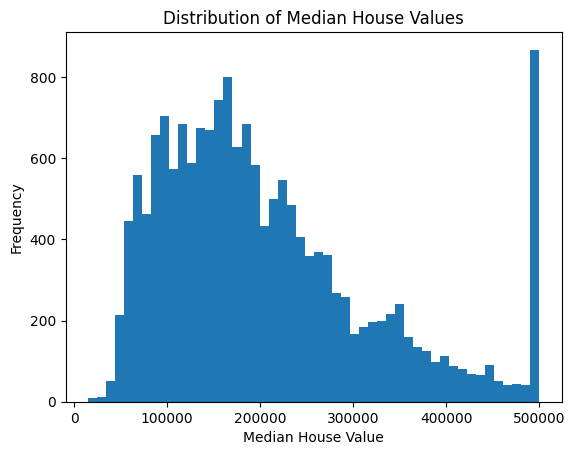

In [4]:
# Traccia la distribuzione della variabile target (median_house_value)
import matplotlib.pyplot as plt
plt.hist(train_set["median_house_value"], bins=50)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Values")
plt.show()

**Domanda di ricerca**: possiamo *predire* il median_house_value basandoci sulle feature che abbiamo nel nostro dataset?

A) Assumiamo che i campioni nel nostro dataset $T$ siano indipendenti e identicamente distribuiti.  
B) Questo è un problema di *regression* poiché abbiamo a che fare con variabili di output numeriche.

In [5]:
# Normalizza i dati di addestramento. Poiché abbiamo a che fare con feature continue, usiamo Standardization (Z-score normalization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Lo StandardScaler da sklearn è esattamente quello che vogliamo: { z = (x - u) / s } dove u è la media dei campioni di addestramento o zero se with_mean=False, e s è la deviazione standard dei campioni di addestramento o uno se with_std=False.
train_set_scaled = scaler.fit_transform(train_set.drop("median_house_value", axis=1))
train_set_scaled = pd.DataFrame(train_set_scaled, columns=train_set.columns[:-1])
train_set_scaled["median_house_value"] = train_set["median_house_value"]
train_set_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543,66900.0
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483,80100.0
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105,85700.0
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600,73400.0
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454,65500.0


In [6]:
# Adesso usiamo k-NN per predire il valore mediano della casa basandoci sulle altre feature. Usiamo KNeighborsRegressor da sklearn.
X = train_set_scaled.drop("median_house_value", axis=1)
y = train_set_scaled["median_house_value"]

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X, y)
# Adesso predictiamo il valore mediano della casa per il test set. Abbiamo bisogno di applicare lo stesso scaling al test set come abbiamo fatto al training set.
test_set_scaled = scaler.transform(test_set.drop("median_house_value", axis=1)) # Test scalato
test_set_scaled = pd.DataFrame(test_set_scaled, columns=test_set.columns[:-1])  # Converti a DataFrame
test_set_scaled["median_house_value"] = test_set["median_house_value"]  # Aggiungi di nuovo la variabile target al test set scalato

X_test = test_set_scaled.drop("median_house_value", axis=1)
y_test = test_set_scaled["median_house_value"]
y_pred = knn.predict(X_test)

print("Predictions:", y_pred[:5])
print("Actual values:", y_test[:5].values)

Predictions: [362420. 200380. 263660. 272640.  74840.]
Actual values: [344700. 176500. 270500. 330000.  81700.]


In [7]:
# Adesso valutiamo le prestazioni del nostro modello usando Mean Absolute Error (MAE).
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error: ", mse)

Mean Absolute Error: 42687.0638
Mean Squared Error:  3967182430.175587


In [8]:
# Troviamo un valore appropriato per k usando cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np
k_values = range(1, 21)
cv_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_error')
    cv_scores.append(-scores.mean())

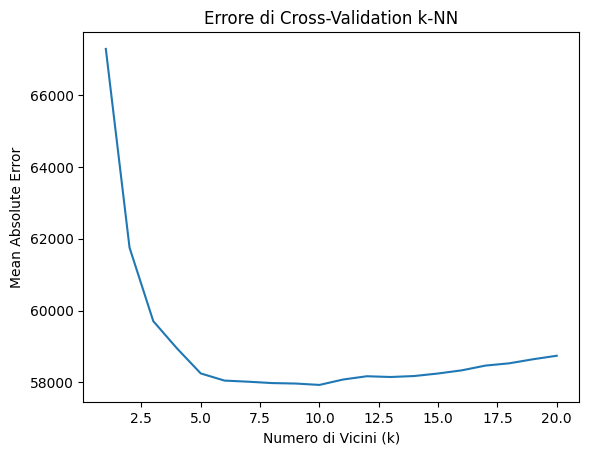

Miglior k: 10


In [9]:
plt.plot(k_values, cv_scores)
plt.xlabel("Numero di Vicini (k)")
plt.ylabel("Mean Absolute Error")
plt.title("Errore di Cross-Validation k-NN")
plt.show()
print("Miglior k:", k_values[np.argmin(cv_scores)])

In [11]:
# Sembra che per k = 10 otteniamo il più basso MAE. Rinaddestriamo il nostro modello con k = 10 e lo valutiamo sul test set.
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X, y)
y_pred = knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error: ", mse)

Mean Absolute Error: 41799.176666666666
Mean Squared Error:  3814875977.5305266


---


In [78]:
import pandas as pd

df = pd.read_csv("/workspaces/ml-foundations-cours-2026/Student_Performance.csv")
df.head()
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='str')

In [39]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  str    
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), str(1)
memory usage: 468.9 KB


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [46]:
df.describe(include = ["str"]).T

,count,unique,top,freq
Extracurricular Activities,10000,2,No,5052


Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64


<Axes: >

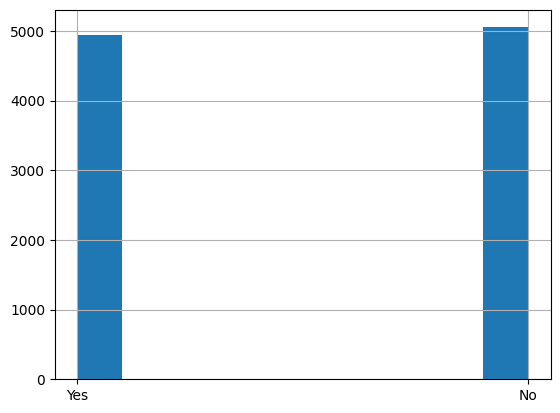

In [54]:
print(df["Extracurricular Activities"].value_counts())
df["Extracurricular Activities"].hist()

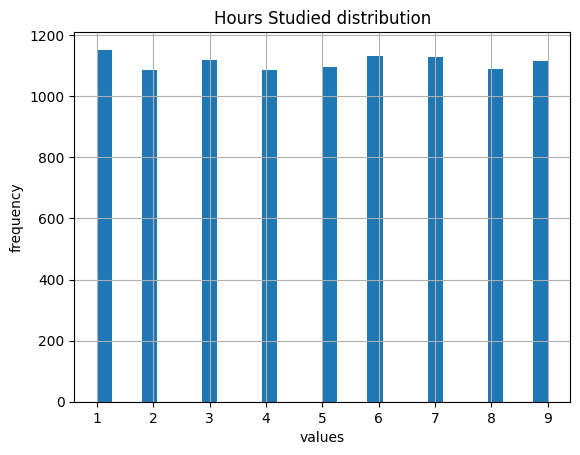

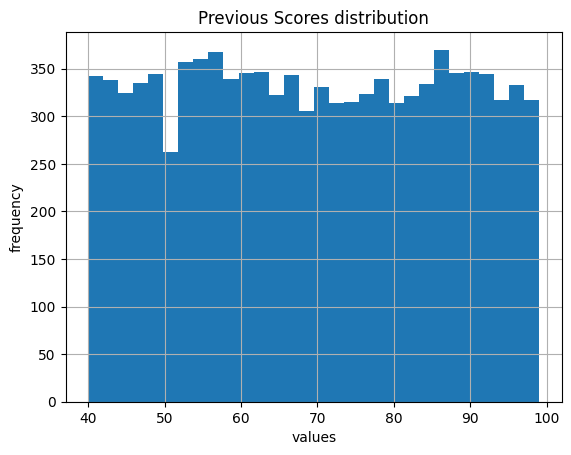

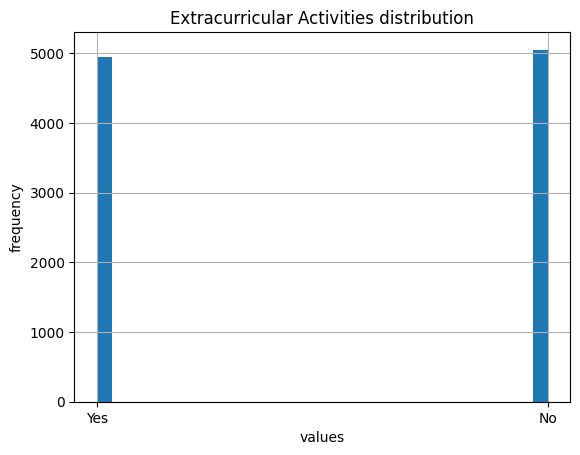

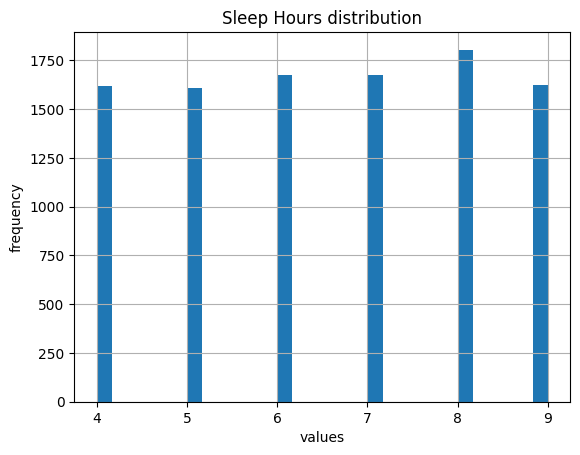

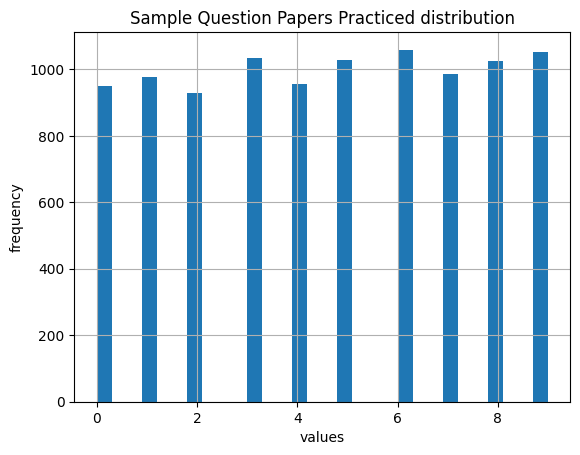

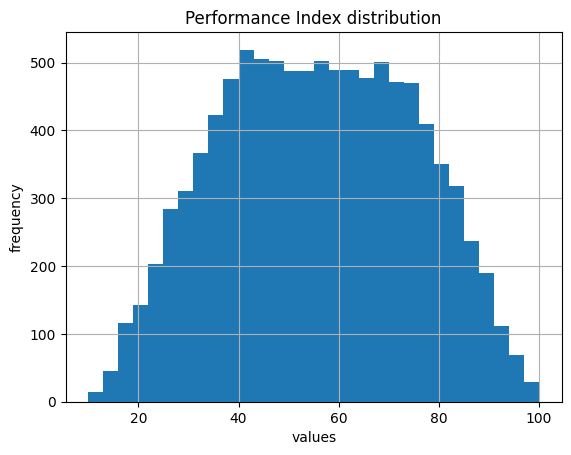

In [55]:
# Distribuzione di ogni feature
import matplotlib.pyplot as plt

for feat in df.columns:
    plt.figure()
    df[feat].hist(bins = 30)
    plt.title(f"{feat} distribution"), plt.xlabel("values"), plt.ylabel("frequency")

<Axes: >

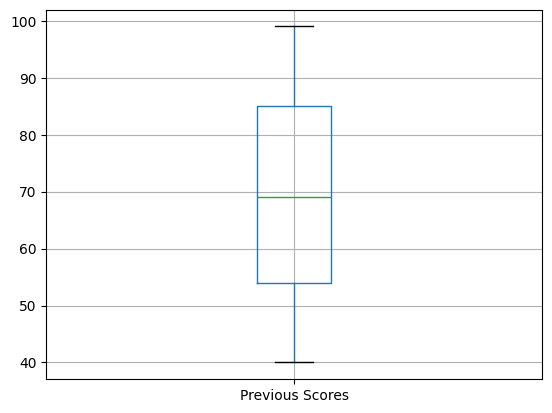

In [59]:
import seaborn as sns

df.boxplot(column=["Previous Scores"])

Il 50% degli studenti ha avuto uno score inferiore a 70. Il voto più alto è stato sotto il 100 e il voto più basso 40.

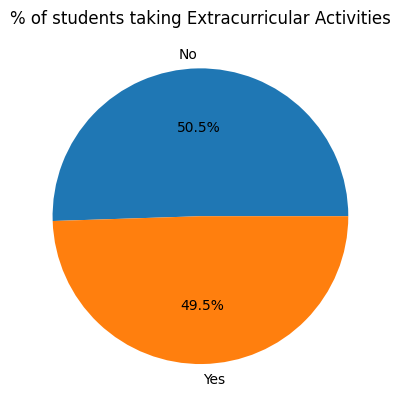

In [68]:
df["Extracurricular Activities"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.title("% of students taking Extracurricular Activities")
plt.show()

poco più del 50% degli studenti non fa attività extracurricolari

Text(0.5, 1.0, 'Correlation Heatmap')

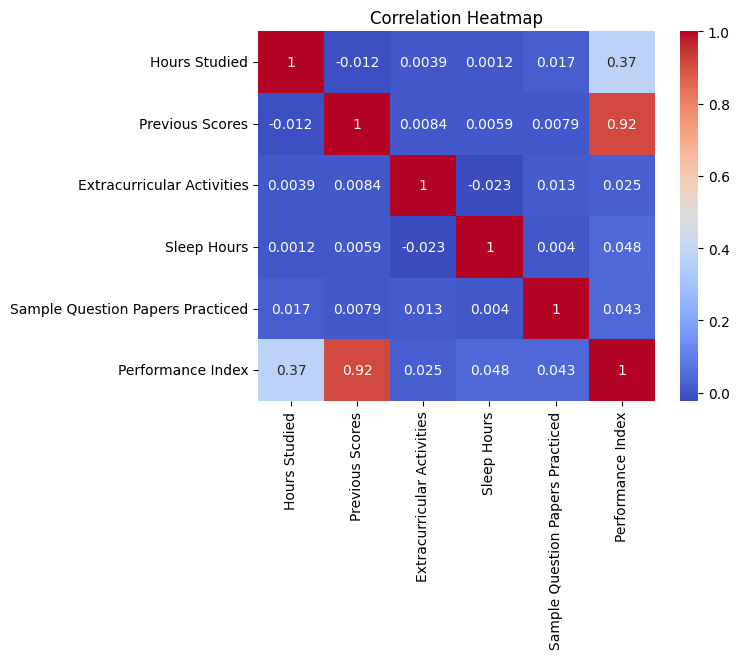

In [80]:
# correlazione tra ogni feature e output 

# df["Extracurricular Activities"] è un input categorico binario. Convertiamolo in numerico 0 e 1.
df2 = df.copy()
df2["Extracurricular Activities"] = df2["Extracurricular Activities"].map({"No": 0, "Yes": 1})
df2.head()

correlations = df2.corr(numeric_only=True)
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")


Possiamo osservare un'alta correlazione tra Previous Scores e Performance Index. C'è anche una lieve correlazione tra Hours Studied e Performance Index. Approfondiamoli.

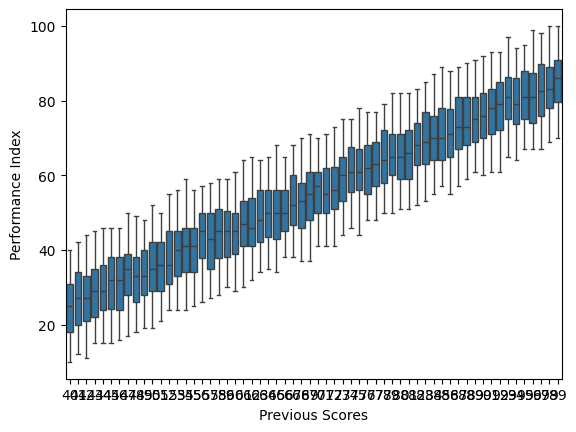

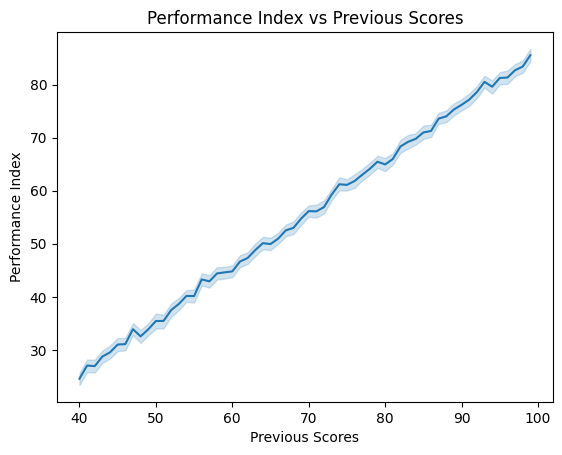

In [87]:
sns.boxplot(x="Previous Scores", y="Performance Index", data=df2)
plt.show()

# Troppi valori sulla x, plottiamo l'andamento della media della Performance Index in funzione dei Previous Scores
sns.lineplot(x="Previous Scores", y="Performance Index", data=df2, estimator='mean')
plt.title("Performance Index vs Previous Scores")
plt.show()

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

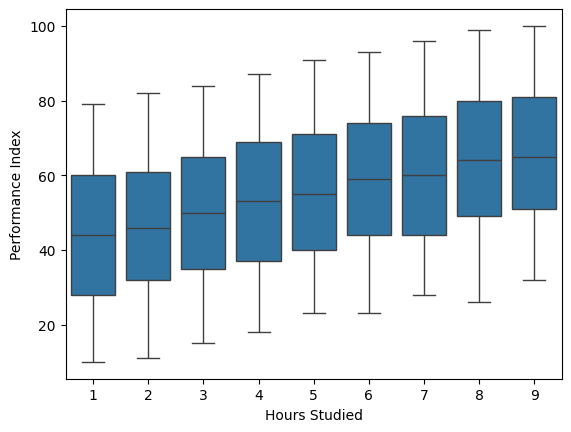

In [83]:
sns.boxplot(x="Hours Studied", y="Performance Index", data=df2)

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

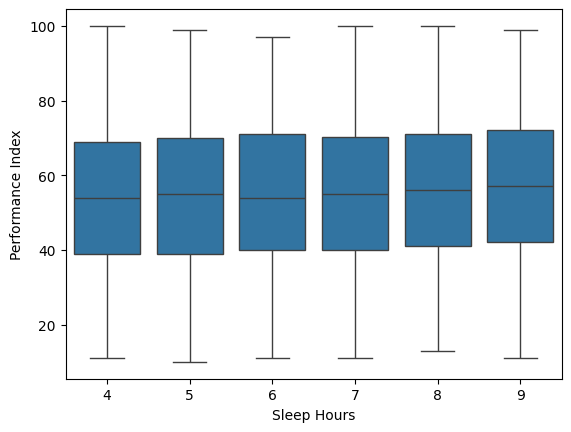

In [84]:
sns.boxplot(x="Sleep Hours", y="Performance Index", data=df2)

Possiamo notare che:
- chi aveva uno score alto pregresso tende a mantenerlo alto
- chi studia più ore tende ad ottenere un indice di performance alto
- la quantità di ore dormite non influisce moltissimo sull'indice di performance

In [129]:
# Iniziamo l'addestramento
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

preprocessor = ColumnTransformer(
    transformers = [
        ('encoder', OrdinalEncoder(), X.select_dtypes(include=['str']).columns.tolist()),
        ('scale', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns.tolist())
    ]
)

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

hyperparams = {
    "regressor__n_neighbors": list(range(1, 30, 5)),
    "regressor__weights": ["uniform", "distance"],
    "regressor__algorithm": ['ball_tree', 'kd_tree', 'brute'],
    "regressor__leaf_size": list(range(1, 2, 10)),
    "regressor__metric": ["euclidean", "manhattan", "minkowski"],
}

gs_knn = GridSearchCV(
    pipeline, hyperparams,  
    cv=5, n_jobs=-1,
    scoring="neg_mean_squared_error", refit=True
)

gs_knn.fit(X_train, y_train)

print("Migliori iperparametri:", gs_knn.best_params_)
print("CV RMSE (best):", (-gs_knn.best_score_)**0.5)

/tmp/ipykernel_14981/2575311053.py:16: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  ('encoder', OrdinalEncoder(), X.select_dtypes(include=['object']).columns.tolist()),


Migliori iperparametri: {'regressor__algorithm': 'brute', 'regressor__leaf_size': 1, 'regressor__metric': 'euclidean', 'regressor__n_neighbors': 16, 'regressor__weights': 'distance'}
CV RMSE (best): 2.85219216647539


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = gs_knn.predict(X_test)
rmse_knn = mean_squared_error(y_test, y_pred)**0.5
mae_knn  = mean_absolute_error(y_test, y_pred)
r2_knn   = r2_score(y_test, y_pred)

print(f"Test RMSE (k-NN): {rmse_knn:.4f}")
print(f"Test MAE  (k-NN): {mae_knn:.4f}")
print(f"Test R^2  (k-NN): {r2_knn:.4f}")

Test RMSE (k-NN): 2.6656
Test MAE  (k-NN): 2.1025
Test R^2  (k-NN): 0.9806


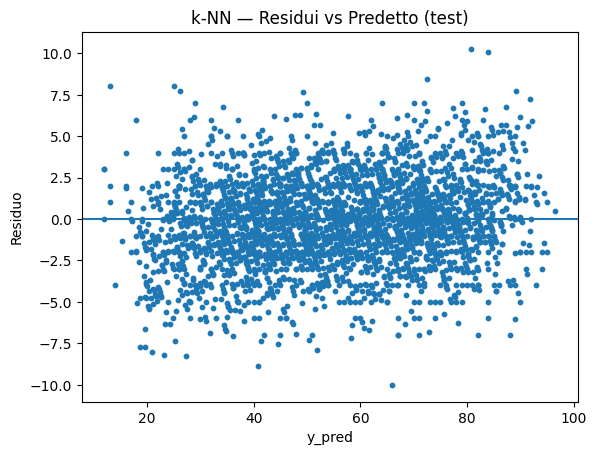

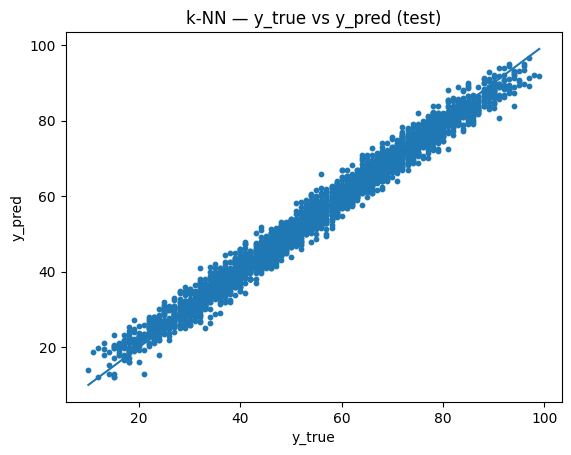

In [123]:
# Residui
res_knn = y_test - y_pred

plt.figure()
plt.scatter(y_pred, res_knn, s=10)
plt.axhline(0)
plt.title("k-NN — Residui vs Predetto (test)")
plt.xlabel("y_pred"); plt.ylabel("Residuo")
plt.show()

plt.figure()
plt.scatter(y_test, y_pred, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.title("k-NN — y_true vs y_pred (test)")
plt.xlabel("y_true"); plt.ylabel("y_pred")
plt.show()